In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
import sys,time
sys.path.insert(1, '../discrete_mixflows/')
from discrete_mixflows import *
import gibbs
from concrete import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"]=15,7.5
plt.rcParams.update({'font.size': 24})

In [2]:
# data generation
np.random.seed(2023)
N=1000
K=3
true_mu=np.array([-7.5,0,7.5])
true_tau=0.4*np.ones(3)
true_w=np.array([0.2,0.5,0.3])

x=np.random.choice(np.arange(K,dtype=int),size=N,p=true_w)
y=true_mu[x]+np.random.randn(N)/np.sqrt(true_tau[x])

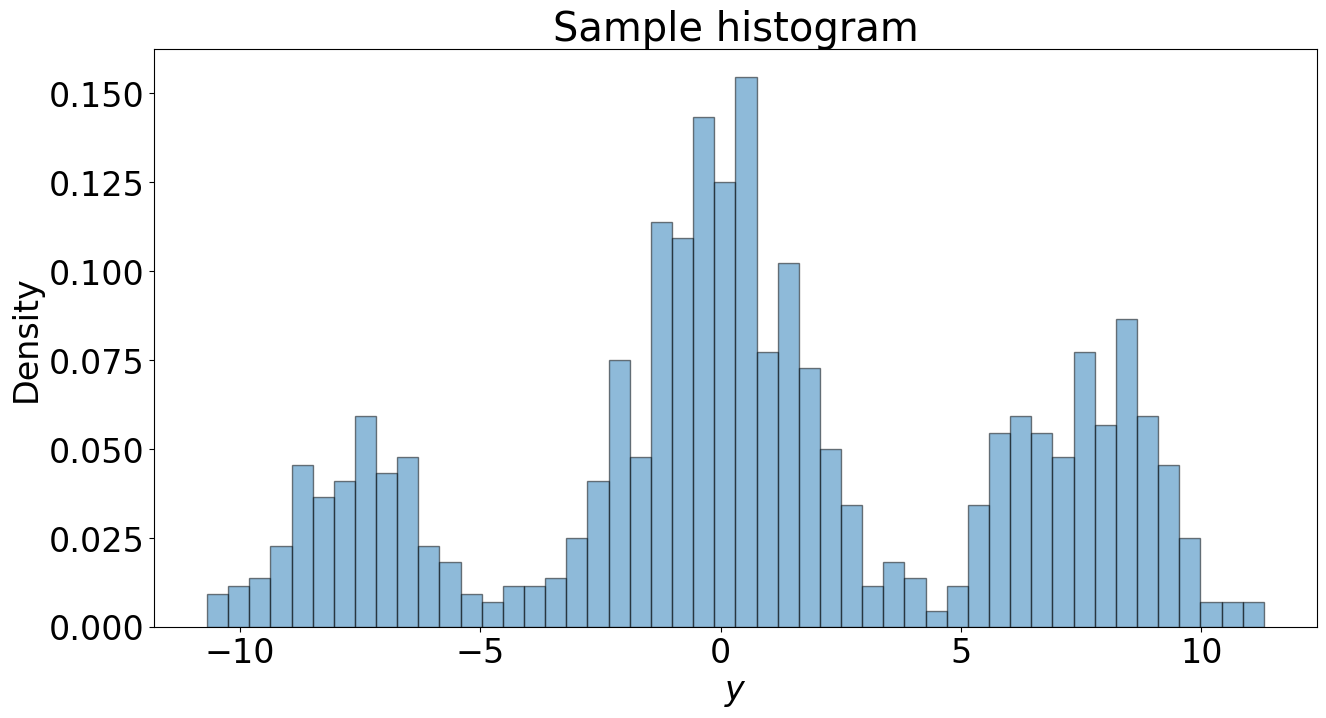

In [3]:
plt.hist(y,bins=50,alpha=0.5,ec='black',density=True)
plt.xlabel(r'$y$')
plt.ylabel('Density')
plt.title('Sample histogram');

In [4]:
tau0=0.1
steps=1000
pred_x,pred_mu=gibbs.gibbs_gmm(y,true_w,true_tau,tau0,steps,burnin_pct=0.9,verbose=True,seed=2023)

In [5]:
print(pred_mu[:,-1])

[-7.07016263  0.10973318  7.31518861]


In [6]:
confusion_matrix(x,pred_x[:,-1])

array([[176,   0,   0],
       [ 19, 513,   6],
       [  0,   1, 285]])

In [7]:
# estimate probabilities of each xn
x_prbs=np.sum(pred_x==np.arange(0,K,dtype=int)[:,np.newaxis,np.newaxis],axis=-1)
x_prbs=(x_prbs/np.sum(x_prbs,axis=0)[np.newaxis,:]).T
print(x_prbs)

[[0.015 0.985 0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 ...
 [0.41  0.59  0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]]
